In [1]:
# to import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# to import planets dataset from seaborn library and check its info

df = sns.load_dataset('planets')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
# to print mode, mean and median of the distance variable in the df dataframe ignoring nan values

mode_dist = stats.mode(df.distance, nan_policy='omit')[0]
mean_dist = np.nanmean(df.distance)
median_dist = np.nanmedian(df.distance)

print('Mode:', mode_dist)
print('Mean:', mean_dist)
print('Median:', median_dist)

Mode: 780.0
Mean: 264.06928217821786
Median: 55.25


In [6]:
# to create df_stats dataframe with statistics about distance column in the df dataframe

df_stats = pd.DataFrame({'min': [df.distance.min()], 
        'mode': [mode_dist],
        'mean': [mean_dist],
        'median': [median_dist],
        'max': [df.distance.max()],
        'range': [df.distance.max() - df.distance.min()],
        'iqr': [stats.iqr(df.distance, nan_policy='omit')],
        'stdev': [np.std(df.distance, ddof=1)]})
df_stats

,min,mode,mean,median,max,range,iqr,stdev
0,1.35,780.0,264.069282,55.25,8500.0,8498.65,145.94,733.116493


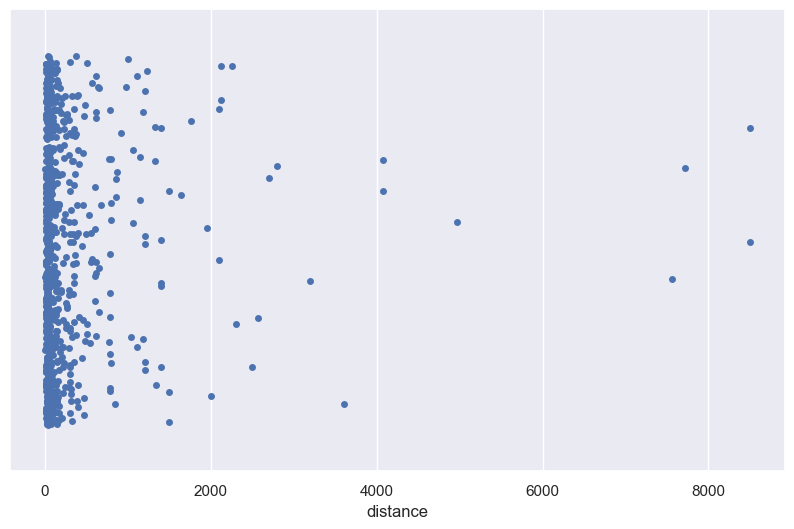

In [7]:
# to create a stripplot for a quick visualization of the distribution

sns.set_theme(rc={'figure.figsize':(10, 6)}) 
sns.stripplot(df, x='distance', jitter=0.4, linewidth=0)
plt.show()

In [8]:
# to create a function that returns the median of a column in a dataframe

def my_median(df, col):
    df_tmp = df.copy()
    df_tmp = df_tmp[col].dropna().sort_values()
    n = len(df_tmp)
    if n%2 != 0:
        # n is odd
        loc = int((n-1)/2)
        med = df_tmp.iloc[loc]
    else:
        # n is even
        loc1 = int((n-2)/2)
        loc2 = int(n/2)
        med = (df_tmp.iloc[loc1] + df_tmp.iloc[loc2])/2
    return med

In [9]:
my_median(df, 'distance')

55.25

In [13]:
# to create a function that returns the standard deviation

def my_stdev(df, col):
    df_tmp = df.copy()
    df_tmp = df_tmp[col].dropna()
    avg = np.mean(df_tmp)
    dev_list = [(el - avg) for el in df_tmp]
    sq_dev = [dev**2 for dev in dev_list]
    var = sum(sq_dev)/(len(sq_dev)-1) # ddof = 1
    stdev = np.sqrt(var)
    return stdev
    

In [14]:
my_stdev(df, 'distance')

733.1164929404423

In [15]:
# to create a function that returns one of these values: mean, median, iqr or stdev.

def my_stat(df, col, stat):
    df_tmp = df.copy()
    if stat == 'mean':
        return np.nanmean(df_tmp[col])
    elif stat == 'median':
        return np.nanmedian(df_tmp[col])
    elif stat == 'iqr':
        return stats.iqr(df_tmp[col], nan_policy='omit')
    elif stat == 'stdev':
        df_tmp = df_tmp[col].dropna()
        return np.std(df_tmp, ddof=1)
    else:
        stat_options = ['mean', 'median', 'iqr', 'stdev']
        raise NameError ('Invalid stat. Choose one of stat_options:', stat_options)

In [16]:
for measure in ['mean', 'median', 'iqr', 'stdev']:
    print(f'{measure}:', my_stat(df, 'distance', measure))

mean: 264.06928217821786
median: 55.25
iqr: 145.94
stdev: 733.1164929404422


In [18]:
# to check the error in my_stat function

my_stat(df, 'distance', 'range')

NameError: ('Invalid stat. Choose one of stat_options:', ['mean', 'median', 'iqr', 'stdev'])

In [19]:
# to load iris dataset from seaborn library

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
# to check statistics about the numeric variables

iris_stats = iris.describe()
iris_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# to add a row with iqr values

iris_stats.loc['iqr'] = iris_stats.loc['75%'] - iris_stats.loc['25%']
iris_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
iqr,1.300000,0.500000,3.500000,1.500000


Mean and median are not so different for each variable, but petal lenght and petal width have a median a bit more higher than the mean. Thus, those variables have a cluster of lower extreme values even if they aren't so many. Furthermore, the interquartile range is greater than the standard deviation for all the variables, but this difference is not so important for the sepal width. So, this variable has a smaller variabiliy.

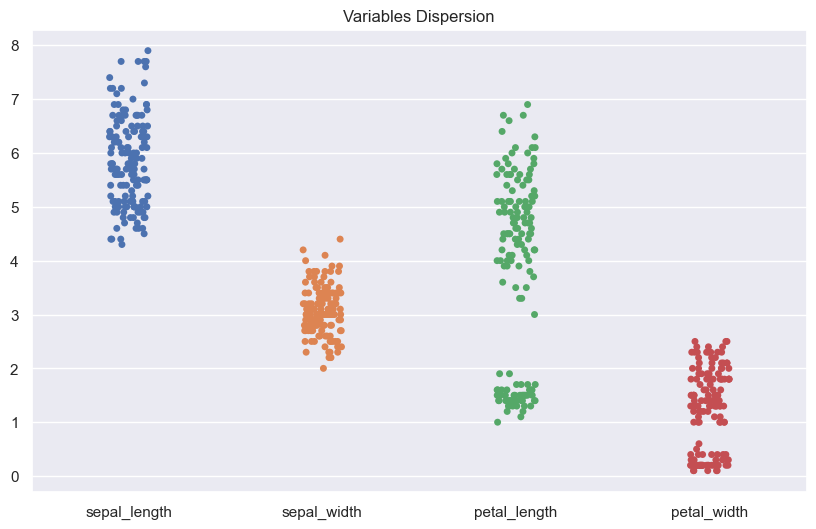

In [22]:
# to visualize data from iris dataframe
 
sns.stripplot(iris).set(title='Variables Dispersion')
plt.show()

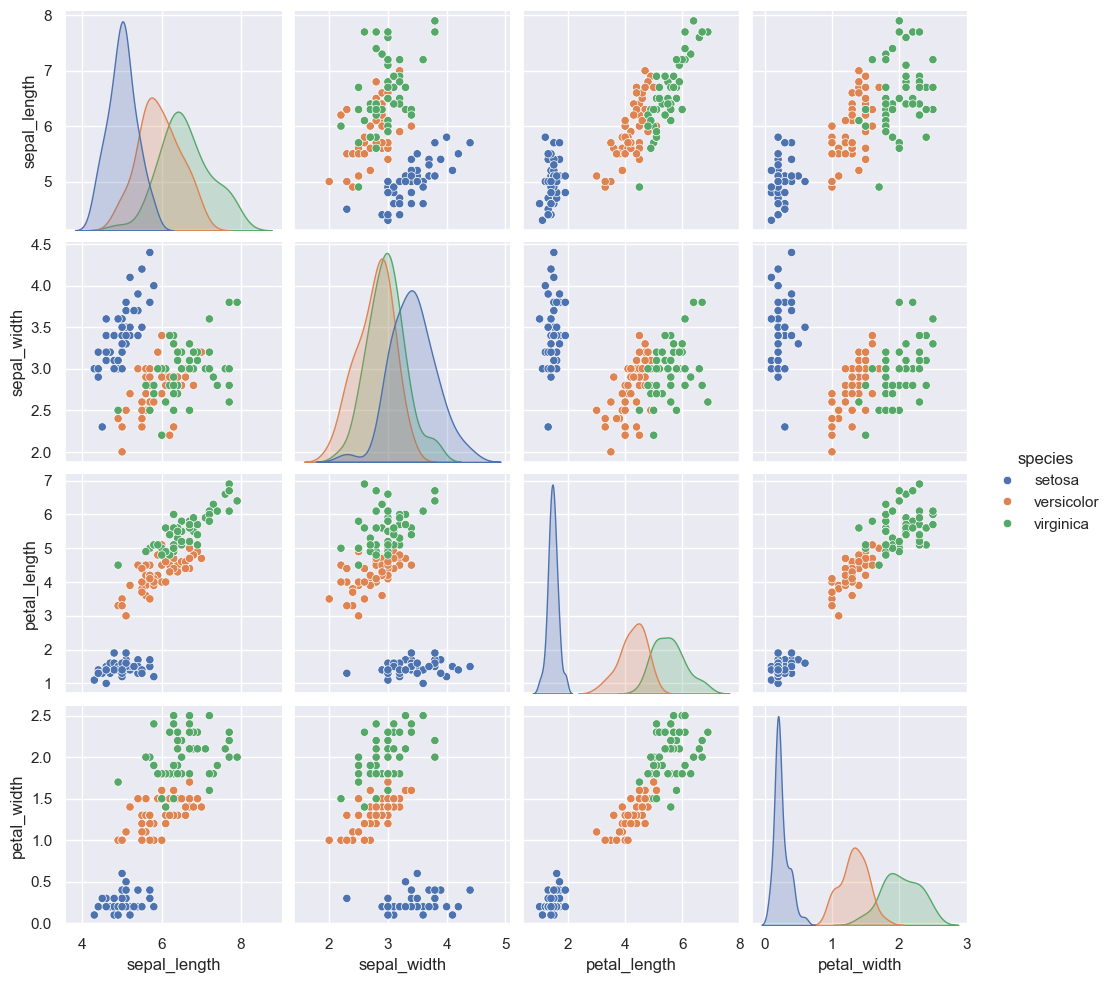

In [24]:
sns.pairplot(iris, hue='species')
plt.show()